In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
sys.path.append("../")

import torch
from cont_speech_experiment import ContinuousSpeechExperiment, ClasswiseDataset
from nupic.research.support import parse_config

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config_file = "../experiments.cfg"
with open(config_file) as cf:
    config_init = parse_config(cf)

exp = "sparseCNN2"
config = config_init[exp]
config["name"] = exp
config["seed"] = np.random.randint(0,200)
config["cnn_out_channels"] = (128, 128)
config["linear_n"] = (1000,11)

# config["boost_strength"] = 0.0
# config["boost_strength_factor"] = 0.0
config["duty_cycle_period"] = 2000

experiment = ContinuousSpeechExperiment(config)

Creating optimizer with learning rate= 0.01


In [3]:
experiment.train_entire_dataset(1)

In [48]:
loader = experiment.full_train_loader
optimizer = torch.optim.SGD(experiment.model.parameters(), lr=0.01)
criterion = torch.nn.functional.nll_loss
l_iters = []

for i, (x,y) in enumerate(loader):
    optimizer.zero_grad()
    output = experiment.model(x.cuda())
    loss = criterion(output, y.cuda())
    loss.backward()
    optimizer.step()
    l_iters.append(experiment.model.linear1_kwinners.boost_strength_factor)

In [44]:
experiment.model.linear1_kwinners.boost_strength_factor = 0.1

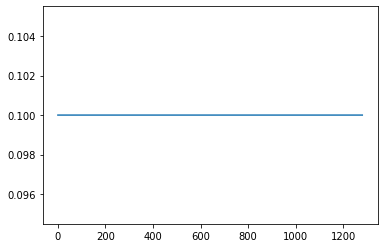

In [49]:
plt.plot(l_iters)

In [53]:
experiment.model.apply()

In [16]:
x = np.linspace(0,20,200)
def bf(x):
    targetDensity = 0.1
    boostStrength = 1.5
    return np.exp(-boostStrength * (x - targetDensity))

$boostFactors = \exp(-boostStrength \times (dutyCycles - targetDensity))$

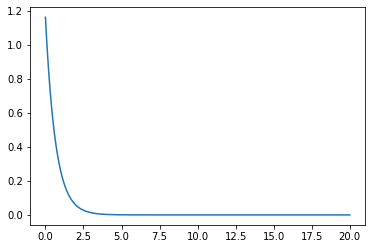

In [17]:
plt.plot(x, bf(x))

In [54]:
from nupic.torch.modules.k_winners import KWinnersBase

In [56]:
isinstance(experiment.model.linear1_kwinners, KWinnersBase)

True